In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df1 = pd.read_csv("results/lua.csv")
df2 = pd.read_csv("results/bash.csv")
df = pd.concat([df1, df2])

In [3]:
def _get(mode):
    return df[df["mode"] == mode].sort_values('benchmark')

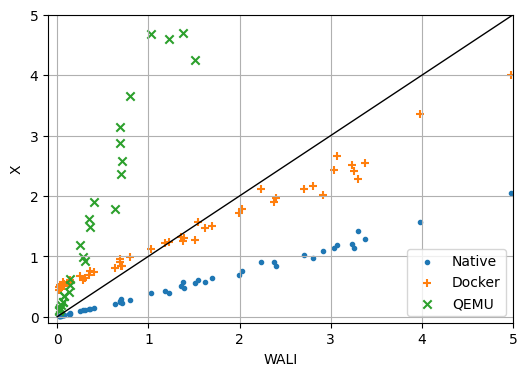

In [7]:
modes = {
    "native": "Native",
    "docker": "Docker",
    "qemu": "QEMU"
}

fig, axs = plt.subplots(1, 1, figsize=(6, 4))

x = _get("wali")
markers = ['.', '+', 'x']
for (name, label), marker in zip(modes.items(), markers):
    axs.scatter(x["wall"], _get(name)["wall"], marker=marker, label=label)

axs.legend()
axs.plot([0, 5], [0, 5], color='black', linewidth=1)
axs.set_xlim(-0.1, 5)
axs.set_ylim(-0.1, 5)
axs.set_xlabel("WALI")
axs.set_ylabel("X")
axs.grid()